# SOCIAL MEDIA DEMOGRAPHICS

What are the demographics of the world's largest social media platform?

Average Gender?
Average Age?
Most Common Date Of Birth?


<img src="https://1000logos.net/wp-content/uploads/2016/11/meta-logo.png" alt="drawing" width="60" height='40' style='display:inline'/>





# Data Cleaning and Extraction

### 1. First, we need to get the data

In [54]:
import csv
import pandas as pd

input_file = csv.DictReader(open("cpa1_data/facebook_data.csv", "r", encoding='UTF-8'))

#get only highly active accounts
cleaned_user_data = [user for user in (user_image for user_image in input_file) 
                    if int(user['dob_year'])>1960 and 
                    int(user['friend_count'])>10 and 
                    int(user['friendships_initiated'])>10 and 
                    int(user['tenure'])>50 and 
                    int(user['likes'])>100 and
                    (user['gender']=='male' or user['gender']=='female')]

#create a pandas dataframe
df = pd.DataFrame(cleaned_user_data)
#describe the dataframe
df.describe()

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
count,15608,15608,15608,15608,15608,15608,15608,15608,15608,15608,15608,15608,15608,15608,15608
unique,15608,40,31,40,12,2,1828,2095,1296,2519,2461,2182,1856,1434,1501
top,2109118,18,1,1995,1,female,274,61,46,107,0,0,0,0,0
freq,1,1277,856,1277,1501,10042,40,59,96,83,99,520,180,5598,426


### 2. Now, we can look a little closer at our data set to get a better idea of where some relevant information lies.

In [55]:
# print the array of columns
print(sorted(df), '\n\n')

# print (some of) the index array
print('...', df.index.tolist()[30:50], '...')

['age', 'dob_day', 'dob_month', 'dob_year', 'friend_count', 'friendships_initiated', 'gender', 'likes', 'likes_received', 'mobile_likes', 'mobile_likes_received', 'tenure', 'userid', 'www_likes', 'www_likes_received'] 


... [30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49] ...


In [ ]:
from collections import Counter
import matplotlib.pyplot as plt

male_users = [user for user in cleaned_user_data if user['gender'] == 'male']
female_users = [user for user in cleaned_user_data if user['gender'] == 'female']

user_count = len(cleaned_user_data)

male_user_count = len(male_users)
female_user_count = len(female_users)

ten_to_twenty_users = [user for user in cleaned_user_data if 10<int(user['age'])<20]
twenty_to_thirty_users = [user for user in cleaned_user_data if 21<int(user['age'])<30]
thirty_to_forty_users = [user for user in cleaned_user_data if 31<int(user['age'])<40]
forty_to_fifty_users = [user for user in cleaned_user_data if 41<int(user['age'])<50]
fifty_to_sixty_users = [user for user in cleaned_user_data if 51<int(user['age'])<60]
sixty_plus_users = [user for user in cleaned_user_data if int(user['age'])>61]

ten_to_twenty_users_count = len(ten_to_twenty_users)
twenty_to_thirty_users_count = len(twenty_to_thirty_users)
thirty_to_forty_users_count = len(thirty_to_forty_users)
forty_to_fifty_users_count = len(forty_to_fifty_users)
fifty_to_sixty_users_count = len(fifty_to_sixty_users)
sixty_plus_users_count = len(sixty_plus_users)

dates_of_birth = ['{}/{}/{}'.format(user['dob_day'], user['dob_month'], user['dob_year']) for user in cleaned_user_data]

# Data Visualization

### A. First, let's collect relevant numbers from the dataset

### B. Now, we can begin generating interesting plots with that data:

## 1. Now, we can move on to plotting:

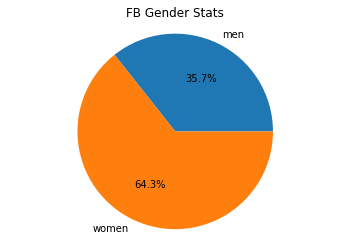

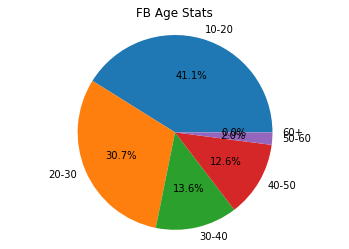

<BarContainer object of 20 artists>

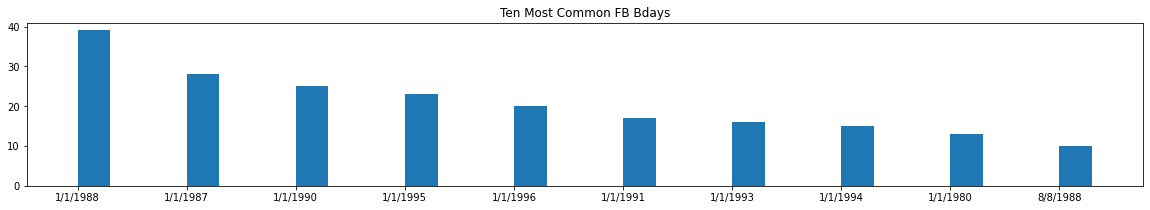

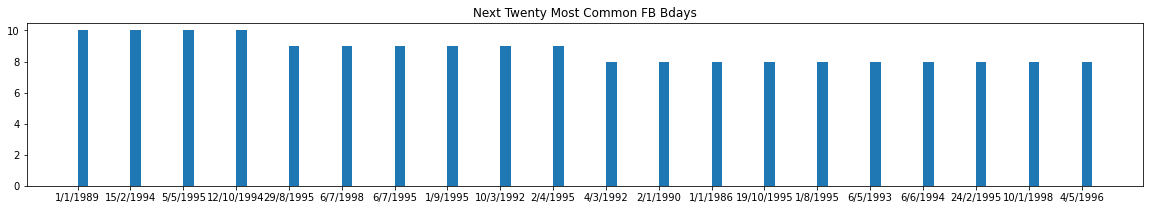

In [57]:
import matplotlib.pyplot as plt

gender_data = [((male_user_count/user_count)*100), ((female_user_count/user_count)*100)]
age_data = [((ten_to_twenty_users_count/user_count)*100), ((twenty_to_thirty_users_count/user_count)*100), ((thirty_to_forty_users_count/user_count)*100),
            ((forty_to_fifty_users_count/user_count)*100), ((fifty_to_sixty_users_count/user_count)*100), ((sixty_plus_users_count/user_count)*100)]

##gender plot
gender_labels = 'men','women'
plt.pie(gender_data,labels=gender_labels,autopct='%1.1f%%')
plt.title('FB Gender Stats')
plt.axis('equal')
plt.show()

##age plot
age_labels = '10-20','20-30','30-40','40-50','50-60','60+'
plt.pie(age_data,labels=age_labels,autopct='%1.1f%%')
plt.title('FB Age Stats')
plt.axis('equal')
plt.show()

##common date of birth
top_ten_dates_counts = (Counter(dates_of_birth).most_common(10))
next_twenty_dates_counts = (Counter(dates_of_birth).most_common(30))[10:31]


top_ten_x = [date_count_tuple[0] for date_count_tuple in top_ten_dates_counts]
top_ten_y = [date_count_tuple[1] for date_count_tuple in top_ten_dates_counts]

top_twenty_x = [date_count_tuple[0] for date_count_tuple in next_twenty_dates_counts]
top_twenty_y = [date_count_tuple[1] for date_count_tuple in next_twenty_dates_counts]

plt.figure(figsize=(20, 3))
plt.title('Ten Most Common FB Bdays')
plt.bar(top_ten_x, top_ten_y, align='edge', width=0.3)

plt.figure(figsize=(20, 3))
plt.title('Next Twenty Most Common FB Bdays')
plt.bar(top_twenty_x, top_twenty_y, align='edge', width=0.2)


## 2. Next, we can create a pivot table from our dataframe to further extact data

        age  dob_day  dob_month  dob_year  friend_count  \
gender                                                    
female  inf      inf        inf       inf           inf   
male    inf      inf        inf       inf           inf   

        friendships_initiated  likes  likes_received  mobile_likes  \
gender                                                               
female                    inf    inf             inf           inf   
male                      inf    inf             inf           inf   

        mobile_likes_received  tenure  userid  www_likes  www_likes_received  
gender                                                                        
female                    inf     inf     inf        inf                 inf  
male                      inf     inf     inf        inf                 inf  


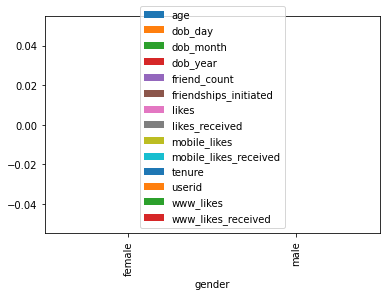

In [59]:
table = pd.pivot_table(data=df,index=['gender'])
print(table)
table.plot(kind='bar');